## EDA

### Importing Necessary Libraries

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Reading and loading dataset

In [45]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


As we can see, we have a good amount of features, such as CreditScore, location, Gender, Age, number of products bought while with the bank, EstimatedSalary, and CardType that we can use to build our model.

However, we also have some unnecessary columns that don't/won't contribute much to the model, such as RowNumber and CustomerId, so let's remove those. The reason why these columns aren't useful is that they are unique to each customer, and so only appear once throughout the entire table. Good features should as a rule of thumb generally appear > 5 times in a table.

Now let's do some Exploratory Data Analysis on our dataset to get a feel of what we're working with.

### How many customers are there per country? How many customers per country have left the bank?

In [46]:
countries = list(df['Geography'].unique())
countries

['France', 'Spain', 'Germany']

In [47]:
country_counts = list(df['Geography'].value_counts())
country_counts

[5014, 2509, 2477]

So, in our dataset, we have around 5000 customers from France, 2500 from Spain, and 2500 from Germany.

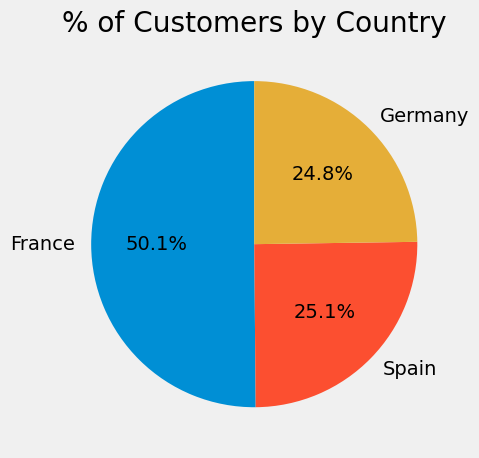

In [48]:
plt.style.use('fivethirtyeight')
plt.pie(country_counts, labels=countries, startangle=90, autopct='%1.1f%%')
plt.title('% of Customers by Country')
plt.tight_layout()
plt.show()

Now let's take a look at how many customers have stopped taking services from the bank by country:

In [49]:
exit_filter = df['Exited'] == 1
exited = df.loc[exit_filter]
exited.groupby(by=['Geography', 'Exited'], as_index=False).size()

,Geography,Exited,size
0,France,1,811
1,Germany,1,814
2,Spain,1,413


So, using this information, this bank might be wary about taking on new customers from especially France and Germany, as these customers have been shown to be twice as likely to leave the bank than customers from Spain.

### Is a customer complaining a sign that they are set to leave the bank?

In [50]:
complain_filter = df['Complain'] == 1
complained = df.loc[complain_filter]
complained

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,1,3,GOLD,764
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,1,0,96833.00,0,1,5,PLATINUM,875
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


In [51]:
complained.groupby(by=['Exited'], as_index=False).size()

,Exited,size
0,0,10
1,1,2034


Yikes, we see that out of a total of 2044 customers who complained to the bank for one reason or another, 2034 (99.5%!!!) of them ended up leaving the bank. The bank could use this information and see it as a sign to first improve their customer service, since its current state doesn't seem to be very successful in solving the issues of their current customers, much less new customers! New customers might look at this data and be turned away from joining a bank that has such poor customer service.

### Could the type of card that the customer possesses influence whether they leave? Why?

In [52]:
card_type = df.groupby(by=['Card Type', 'Exited'], as_index=False).size()
card_type

,Card Type,Exited,size
0,DIAMOND,0,1961
1,DIAMOND,1,546
2,GOLD,0,2020
3,GOLD,1,482
4,PLATINUM,0,1987
5,PLATINUM,1,508
6,SILVER,0,1994
7,SILVER,1,502


Now let's plot this information using a Seaborn countplot:

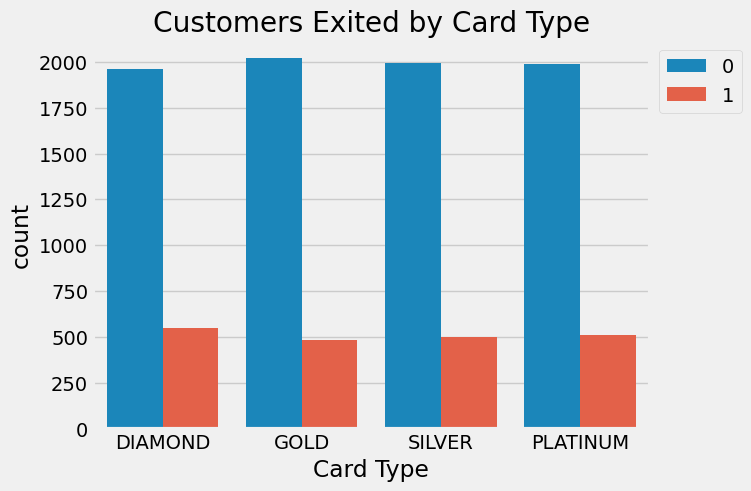

In [53]:
sns.countplot(data=df, x='Card Type', hue='Exited')
plt.title('Customers Exited by Card Type')
plt.tight_layout
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

We might also want to know how likely a person of a certain gender is to leave the bank. We run the same lines of code as above but instead with gender:

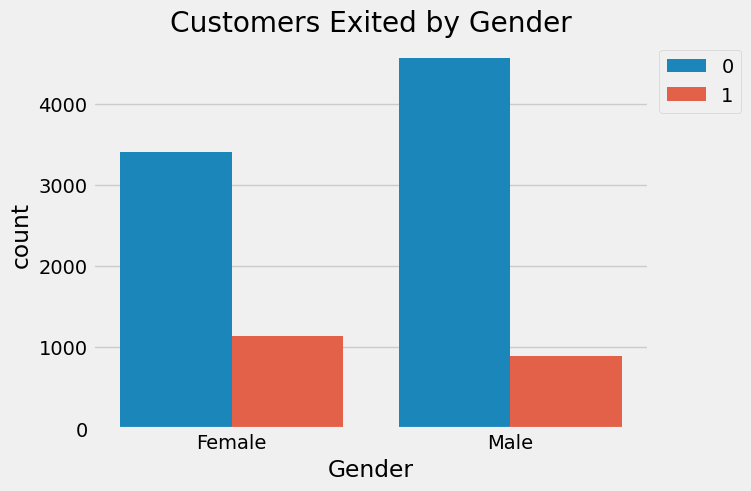

In [54]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Customers Exited by Gender')
plt.tight_layout
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [55]:
df.groupby(by=['Geography', 'Gender', 'Exited'], as_index=False).size()

,Geography,Gender,Exited,size
0,France,Female,0,1801
1,France,Female,1,460
2,France,Male,0,2402
3,France,Male,1,351
4,Germany,Female,0,745
5,Germany,Female,1,448
6,Germany,Male,0,950
7,Germany,Male,1,366
8,Spain,Female,0,858
9,Spain,Female,1,231


## Feature Engineering/Data Cleaning

In [56]:
# drop the Suranme, RowNumber, and CustomerId columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()
# remove Complain column since there is 100% correlation between complain and exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Transforming categorical columns to numerical using OneHotEncoding

Our categorical columns are Card Type, Country, and Gender, categorical meaning that they take on values from a discrete set of possibilities. Most importantly, they are not in numerical form. We should convert them to numerical form before fitting our model.

In [57]:
cardType_encoder = pd.get_dummies(df['Card Type'], dtype=float)
print(cardType_encoder)
df = df.join(cardType_encoder)
df.head()

      DIAMOND  GOLD  PLATINUM  SILVER
0         1.0   0.0       0.0     0.0
1         1.0   0.0       0.0     0.0
2         1.0   0.0       0.0     0.0
3         0.0   1.0       0.0     0.0
4         0.0   1.0       0.0     0.0
...       ...   ...       ...     ...
9995      1.0   0.0       0.0     0.0
9996      0.0   0.0       1.0     0.0
9997      0.0   0.0       0.0     1.0
9998      0.0   1.0       0.0     0.0
9999      1.0   0.0       0.0     0.0

[10000 rows x 4 columns]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,DIAMOND,GOLD,PLATINUM,SILVER
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1.0,0.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1.0,0.0,0.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1.0,0.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0.0,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,0.0,1.0,0.0,0.0


In [58]:
country_encoder = pd.get_dummies(df['Geography'], dtype=float)
print(country_encoder)
df = df.join(country_encoder)
df.head()

      France  Germany  Spain
0        1.0      0.0    0.0
1        0.0      0.0    1.0
2        1.0      0.0    0.0
3        1.0      0.0    0.0
4        0.0      0.0    1.0
...      ...      ...    ...
9995     1.0      0.0    0.0
9996     1.0      0.0    0.0
9997     1.0      0.0    0.0
9998     0.0      1.0    0.0
9999     1.0      0.0    0.0

[10000 rows x 3 columns]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Satisfaction Score,Card Type,Point Earned,DIAMOND,GOLD,PLATINUM,SILVER,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,2,DIAMOND,464,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,3,DIAMOND,456,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,3,DIAMOND,377,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,5,GOLD,350,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,5,GOLD,425,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [59]:
gender_encoder = pd.get_dummies(df['Gender'], dtype=float)
print(gender_encoder)
df = df.join(gender_encoder)
df.head()

      Female  Male
0        1.0   0.0
1        1.0   0.0
2        1.0   0.0
3        1.0   0.0
4        1.0   0.0
...      ...   ...
9995     0.0   1.0
9996     0.0   1.0
9997     1.0   0.0
9998     0.0   1.0
9999     1.0   0.0

[10000 rows x 2 columns]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Point Earned,DIAMOND,GOLD,PLATINUM,SILVER,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,464,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,456,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,425,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


For the three code cells above, we use the dtype argument and set it to float, as we would like to have numerical data wherever possible. Then we add these new one-hot encoding columns to the dataset. This can also be done using pd.concat and setting the axis=1 to indicate that we would like to concatenate column-wise.

In [60]:
# Now we would like to drop the Geography, Gender, and Card Type columns since we have encoded them already
df.drop(columns=['Geography', 'Card Type', 'Gender'], inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,DIAMOND,GOLD,PLATINUM,SILVER,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Feature Selection - should we drop any features?

Before we proceed with the rest of our data processing and building the models, we might want to see if there are any variables/features that we might want to exclude from our dataset, for one reason or another. Maybe such features aren't available when a new customer wishes to join the bank. Maybe they are redundant, meaning that they can be described perfectly by another feature and therefore contribute nothing to the model. To do this, we will use a correlation and plot it as a heatmap to see how strongly features correlate with each other.

<Axes: >

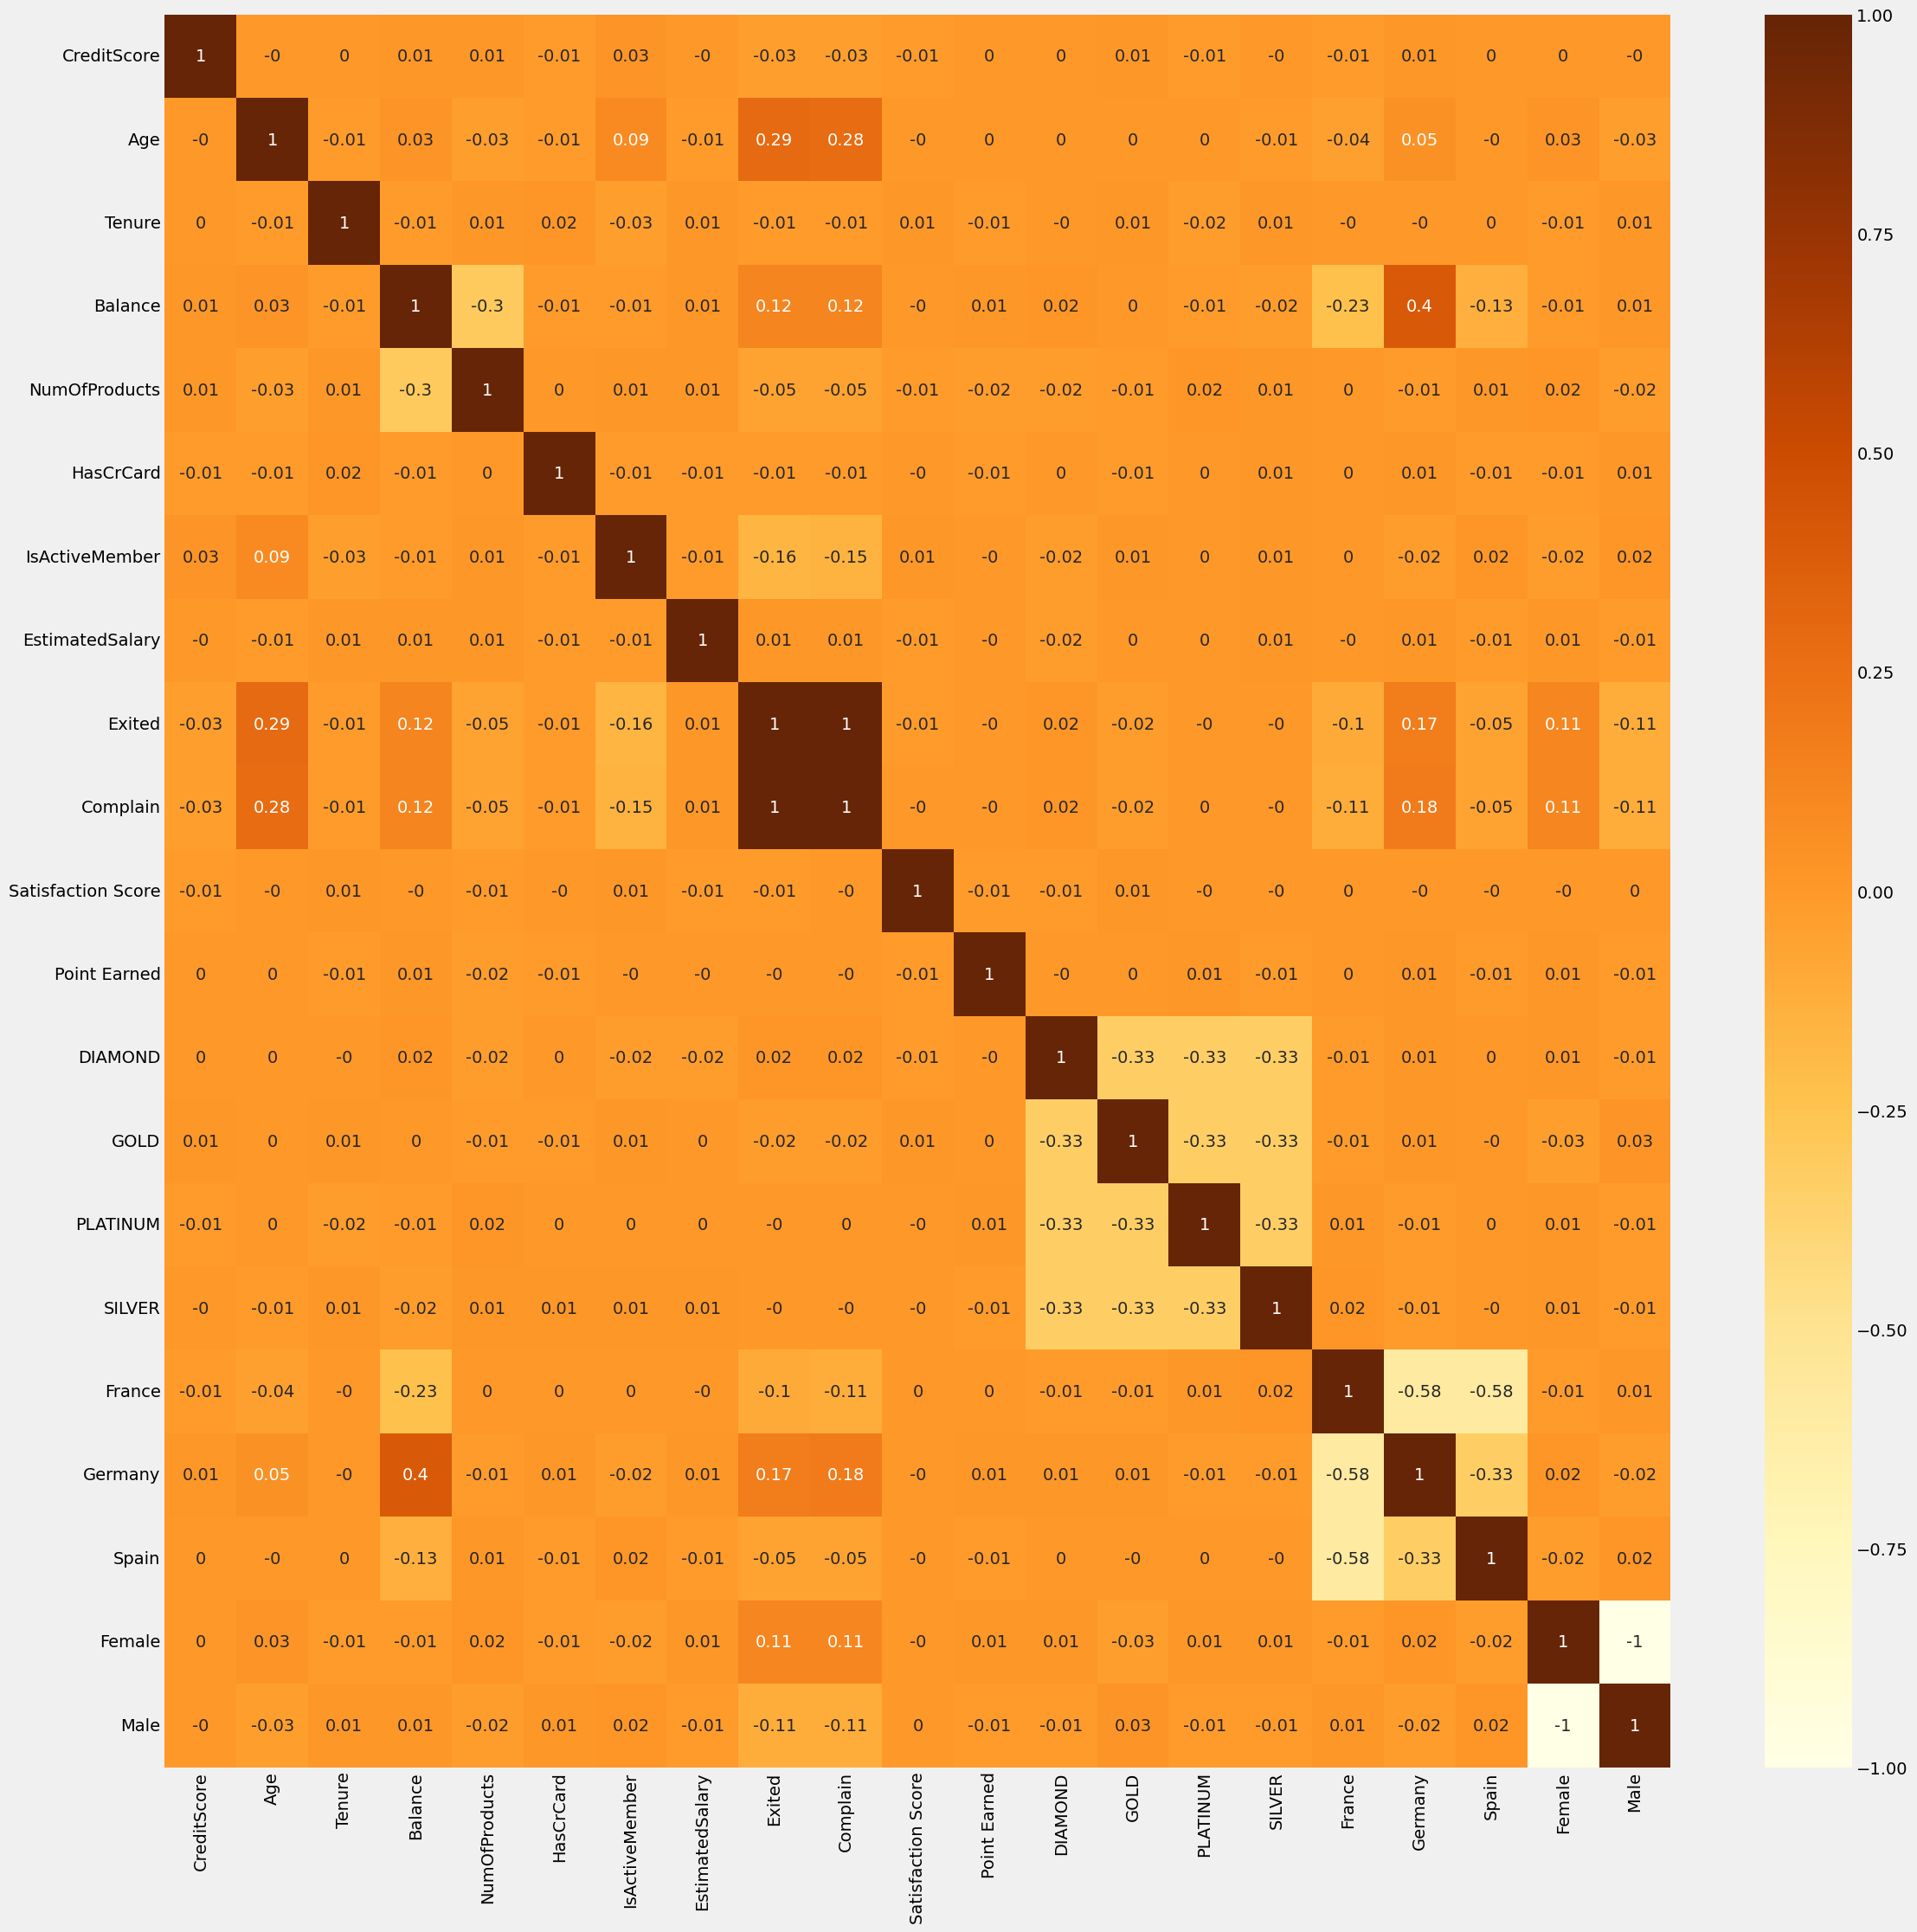

In [61]:
corr = df.corr().round(2)
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot=True, cmap = 'YlOrBr')

We can see from our correlation matrix that the variable Complain is directly 100% correlated with our Exited colum. In other words, in our dataset, if Complain = 0, then Exited will be 0. And if Complain = 1, then Exited will be 1. Let's drop this column since banks won't necessarily have this data for a new prospective customer. For example, if a new customer walks into the bank, they probably won't have a history of complaints about the bank.

In [62]:
X, y = df.drop(columns=['Exited', 'Complain']), df['Exited']

In [63]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,DIAMOND,GOLD,PLATINUM,SILVER,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,2,464,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,3,377,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,5,350,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,5,425,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,300,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,5,771,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,3,564,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,2,339,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

After having converted our categorical columns, we might want to scale/standardize our dataset so that it has mean 0 and variance 1. The purpose of this is so that each column is brought down to the same 'centre' so that the numerical values have more significance. The way of thinking that makes sense for me is that the model knows that the values are all on the scale and so finding relationships between different values is easier.

In [65]:
from sklearn.preprocessing import StandardScaler
# scaling our dataframe using z = (x-u)/ob
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X, y)
X_std

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [66]:
X_std.shape

(10000, 19)

### Splitting data into training and testing set

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8, test_size=0.2, random_state=42, shuffle=True)

In [68]:
X_train

array([[ 0.36701255, -0.66001848,  0.34135195, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.19171334,  0.29351742, -0.35020386, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.94702796, -1.42284721, -0.69598177, ...,  1.74273971,
        -0.91241915,  0.91241915],
       ...,
       [ 0.87400456, -0.08789694, -1.38753759, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 0.17042381,  0.38887101,  1.03290776, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 0.48082708,  1.15169974, -1.38753759, ..., -0.57380915,
        -0.91241915,  0.91241915]])

In [69]:
X_train.shape

(8000, 19)

In [70]:
X_test

array([[-0.56419726, -0.66001848, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.28483432,  0.38887101, -1.38753759, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.51246338,  0.4842246 , -0.35020386, ...,  1.74273971,
         1.09598752, -1.09598752],
       ...,
       [ 0.82227068,  0.77028538,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 0.4290932 , -0.94607926, -0.35020386, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [-0.23310044,  0.00745665, -1.38753759, ..., -0.57380915,
        -0.91241915,  0.91241915]])

In [71]:
X_test.shape

(2000, 19)

In [72]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [73]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

As we can see, our training and testing data has maintained its original shape, and the X datasets now contain only numerical values, where the new value is the amount of z-scores the original value was from the mean of that column.

Let's check how many customers left the bank and how many didn't:

In [74]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

We have a more customers who stayed at the bank than those who left (around a 6000 customer difference!). As such, we should balance the number of each class so that the model(s) don't learn only the trends of who doesn't leave the bank and so can't learn well what trends occur within customers who do leave the bank. We do this with RandomOverSampler, which purposely samples the Exited = 1 class with replacement to balance the number of both classes. 

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
# fit_resample resamples the dataset and retrurns the resampled dataset

### Importing model evaluation metrics

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

We will use a confusion matrix to evaluate our classification models, as well as a classification report, which includes metrics such as f1 score, precision, and recall.    
The confusion matrix helps us identify how we are mis-labelling test data (i.e. false negative/false positive), which could help us in improving our model.

## Using our models

### Logistic Regression

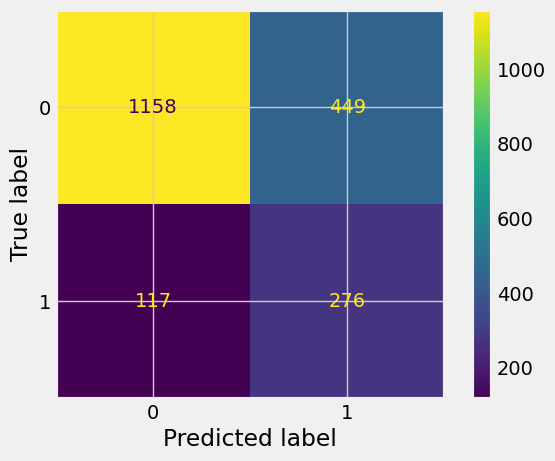

In [77]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(penalty='l2', max_iter=10000)
lreg.fit(X_train, y_train)
lreg_predictions = lreg.predict(X_test)

lreg_cm = confusion_matrix(y_test, lreg_predictions, labels=[0,1])
lreg_cm_display = ConfusionMatrixDisplay(confusion_matrix=lreg_cm)
lreg_cm_display.from_predictions(y_true=y_test, y_pred=lreg_predictions, labels=[0,1])

In [78]:
classification_lreg = classification_report(y_test, lreg_predictions, digits=5)
print(classification_lreg)

              precision    recall  f1-score   support

           0    0.90824   0.72060   0.80361      1607
           1    0.38069   0.70229   0.49374       393

    accuracy                        0.71700      2000
   macro avg    0.64446   0.71144   0.64867      2000
weighted avg    0.80457   0.71700   0.74272      2000



### Naive Bayes

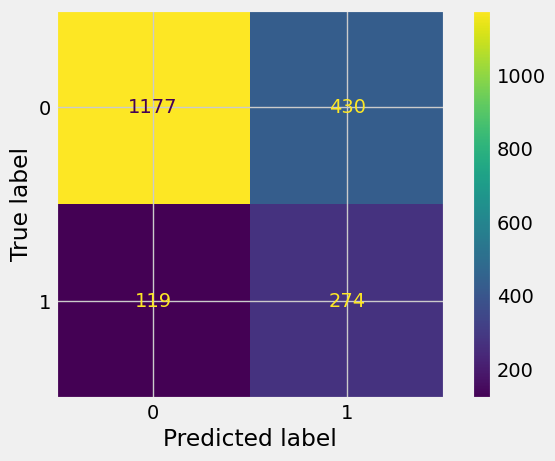

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

nb_cm = confusion_matrix(y_test, nb_predictions, labels=[0,1])
nb_cm_display = ConfusionMatrixDisplay(confusion_matrix=nb_cm)
nb_cm_display.from_predictions(y_true=y_test, y_pred=nb_predictions, labels=[0,1])

In [80]:
classification_nb = classification_report(y_test, nb_predictions, digits=5)
print(classification_nb)

              precision    recall  f1-score   support

           0    0.90818   0.73242   0.81089      1607
           1    0.38920   0.69720   0.49954       393

    accuracy                        0.72550      2000
   macro avg    0.64869   0.71481   0.65521      2000
weighted avg    0.80620   0.72550   0.74971      2000



### Support Vector Machine (SVM)

C:\Users\alann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


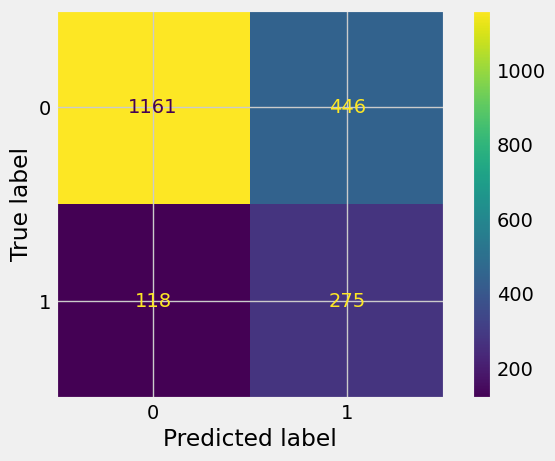

In [81]:
from sklearn.svm import LinearSVC
svm = LinearSVC(penalty='l2', random_state=42, max_iter=10000)
# initialize class object with max iterations 50000 to allow it more time to converge
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_predictions, labels=[0,1])
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
svm_cm_display.from_predictions(y_true=y_test, y_pred=svm_predictions, labels=[0,1])

In [82]:
classification_svm = classification_report(y_test, svm_predictions, digits=5)
print(classification_svm)

              precision    recall  f1-score   support

           0    0.90774   0.72246   0.80457      1607
           1    0.38141   0.69975   0.49372       393

    accuracy                        0.71800      2000
   macro avg    0.64458   0.71110   0.64915      2000
weighted avg    0.80432   0.71800   0.74349      2000



### K-Nearest Neighbours (KNN)

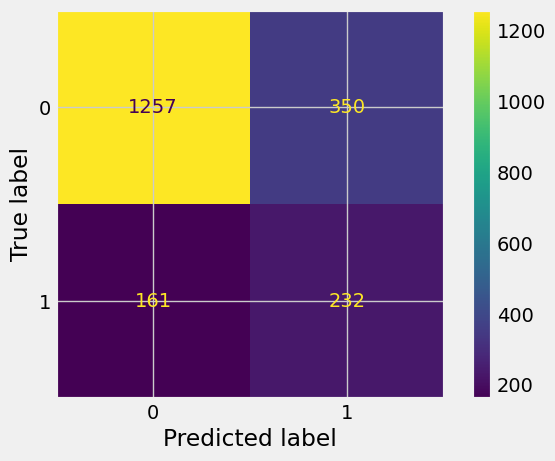

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

knn_cm = confusion_matrix(y_test, knn_predictions, labels=[0,1])
knn_cm_display = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_cm_display.from_predictions(y_true=y_test, y_pred=knn_predictions, labels=[0,1])

In [96]:
classification_knn = classification_report(y_test, knn_predictions, digits=5)
print(classification_knn)

              precision    recall  f1-score   support

           0    0.88646   0.78220   0.83107      1607
           1    0.39863   0.59033   0.47590       393

    accuracy                        0.74450      2000
   macro avg    0.64254   0.68627   0.65349      2000
weighted avg    0.79060   0.74450   0.76128      2000



### Decision Tree

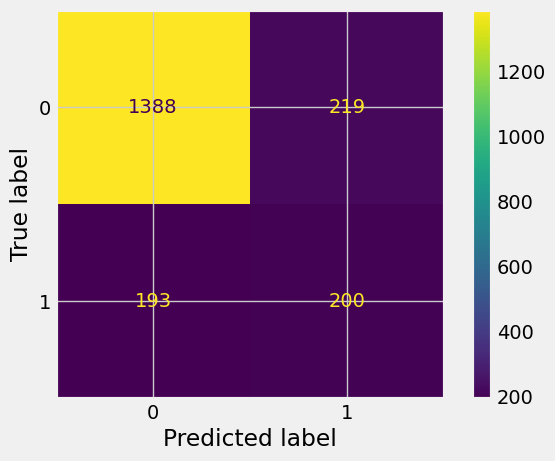

In [85]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='gini', splitter='best')
dTree.fit(X_train, y_train)
dTree_predictions = dTree.predict(X_test)

dTree_cm = confusion_matrix(y_test, dTree_predictions, labels=[0,1])
dTree_cm_display = ConfusionMatrixDisplay(confusion_matrix=dTree_cm)
dTree_cm_display.from_predictions(y_true=y_test, y_pred=dTree_predictions, labels=[0,1])

In [86]:
classification_dTree = classification_report(y_test, dTree_predictions, digits=5)
print(classification_dTree)

              precision    recall  f1-score   support

           0    0.87793   0.86372   0.87077      1607
           1    0.47733   0.50891   0.49261       393

    accuracy                        0.79400      2000
   macro avg    0.67763   0.68631   0.68169      2000
weighted avg    0.79921   0.79400   0.79646      2000



## Summary/takeaways + possible next steps

In this notebook we saw the importance of data preprocessing to building well-performing predictive models. The models in this notebook are by no means extremely well-performing, but the purpose of this project was to familiarize myself with the data science process and to internalize the importance of data preprocessing. Steps such as scaling data so that it all lies within the same scale go unnoticed in our modern day obsessiveness over machine learning models. Much of the time spent with machine learning actually goes into processing the data to ensure that our models can perform optimally.

So, what's next? Well, in terms of making our process more efficient as a whole, there are a few things we can look into:
- Using a pipeline: Instead of instantiating all the classification objects manually, we can create a pipeline for each one where we specify the classification model, hyperparameters, data preprocessing steps, etc. This also ensures that no data leakage occurs, which might lead to misleading results. (Pipelines apply data preprocessing after the data has been split into testing/training sets.
- Using GridSearchCV: Using GridSearch might help us find the best model without us having to do too much work. By specifying which hyperparameters we would like to try, we run an exhaustive search of the different combinations and let the model find the best one. This could lead to better results than leaving parameters at default or leaving it to guesswork to try and 'stumble upon' the most performant model.
- Adjusting the classification threshold: As seen from our confusion matrices, we have more false negatives than we would like. Therefore, we might consider adjusting the classification threshold so that the model predicts less false negatives, thereby improving our f1 score, recall, and precision.